<h2><center>MNIST classification using <i>LeNet5</i></center></h2>

# Importing Keras



In [1]:
# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.14.0
Using keras version 2.14.0


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [3]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet
from keras.datasets import mnist
# START CODE HERE
!free -h
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
!free -h
print(train_labels.shape)
print(train_images.shape)
# END CODE HERE

               total        used        free      shared  buff/cache   available
Mem:            12Gi       919Mi       9.4Gi       1.0Mi       2.4Gi        11Gi
Swap:             0B          0B          0B
11490434/11490434 [==============================] - 1s 0us/step
               total        used        free      shared  buff/cache   available
Mem:            12Gi       991Mi       9.3Gi       1.0Mi       2.4Gi        11Gi
Swap:             0B          0B          0B
(60000,)
(60000, 28, 28)


Turn train and test labels to one-hot encoding

In [5]:
# Turning the lables into one-hot format
from keras.utils import to_categorical
# START CODE HERE
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# END CODE HERE

Reshape train and test images so that they follow the NWHC ordering required by the TF backend. Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation

In [7]:
# Reshaping the images to NWHC scheme
img_rows, img_cols = train_images.shape[1], train_images.shape[2]

# START CODE HERE
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
mean = train_images.mean()
std = train_images.std()
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

# Print the shape of the reshaped and normalized images
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
# END CODE HERE

Shape of train_images: (60000, 28, 28, 1)
Shape of test_images: (10000, 28, 28, 1)


# Defining the neural network architecture (i.e., the network model)
Create a LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.

In [35]:
# The Sequential module is sort of a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.layers import Conv2D

input_shape = (img_rows, img_cols, 1)
output_shape = 10

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

# START CODE HERE
model = Sequential()

model.add(Conv2D(filters = num_kernel_first_conv_layer,
                 kernel_size = kernel_size,
                 input_shape = input_shape,
                 padding = 'same',
                 data_format = 'channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Conv2D(filters = num_kernel_second_conv_layer,
                 kernel_size = kernel_size,
                 input_shape = input_shape,
                 padding = 'same',
                 data_format = 'channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = pool_size))

model.add(Flatten(input_shape = input_shape))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(output_shape))
model.add(Activation('softmax'))

# END CODE HERE

Instantiate a SGD optimizer with a tentative LR of 10^-2 and using the appropriate loss function and compile the model.

In [36]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from keras import optimizers

# START CODE HERE
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_16 (Activation)  (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        2416      
                                                                 
 activation_17 (Activation)  (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                 

# Training the network - fit()

In [16]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 20
# Number of epochs we want to train
epochs = 10
# We restrict the training to 10k images to cut time
history = model.fit(train_images, train_labels,
            batch_size=batch_size, epochs=epochs,
            verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/10
3000/3000 [==============================] - 13s 4ms/step - loss: 2.2815 - accuracy: 0.1543 - val_loss: 2.1941 - val_accuracy: 0.4174
Epoch 2/10
3000/3000 [==============================] - 12s 4ms/step - loss: 1.4934 - accuracy: 0.6270 - val_loss: 0.8138 - val_accuracy: 0.8091
Epoch 3/10
3000/3000 [==============================] - 13s 4ms/step - loss: 0.6117 - accuracy: 0.8437 - val_loss: 0.4586 - val_accuracy: 0.8807
Epoch 4/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.4065 - accuracy: 0.8886 - val_loss: 0.3411 - val_accuracy: 0.9067
Epoch 5/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.3219 - accuracy: 0.9085 - val_loss: 0.2793 - val_accuracy: 0.9202
Epoch 6/10
3000/3000 [==============================] - 16s 5ms/step - loss: 0.2733 - accuracy: 0.9207 - val_loss: 0.2446 - val_accuracy: 0.9296
Epoch 7/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.2402 - accuracy: 0.9295 - val_loss: 0.2170 - val_ac

# Training the network - train_on_batch()
Train the model for 10 epochs using the train_on_batch() and test_on_batch() methods, manually cycling through generations and batches od samples.
Hint 1: instantiate a ImageDataGenerator() to get an iterator over the samples.
Hint 2: store the per-epoch test and train loss and accuracy to plot them later on.

In [37]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# Number of epochs we want to train
epochs = 10

#For being able to plot the training history afterwards
history = {}
history['loss'] = []
history['val_loss'] = []
history['acc'] = []
history['val_acc'] = []

# Creating a batch preprocessor for augmenting the trainig data
from keras.preprocessing.image import ImageDataGenerator
# START CODE HERE
myDatagen = ImageDataGenerator(rotation_range=0,
                               width_shift_range=0,
                               height_shift_range=0,
                               horizontal_flip=False,
                               vertical_flip=False)
batchSize = 32
# END CODE HERE

# Cycling through the epochs
for e in range(epochs):
    lossEpochTrain = 0
    lossEpochTest = 0
    accuracyEpochTrain = 0
    accuracyEpochTest = 0

    # Training over the training samlpes, batch by batch
    batchCntTrain = 0
    for images_batch, labels_batch in myDatagen.flow(train_images, train_labels, batch_size=batch_size):
        # START CODE HERE
        lossEpochTrainl, accuracyEpochTrainl = model.train_on_batch(images_batch, labels_batch)
        lossEpochTrain += lossEpochTrainl
        accuracyEpochTrain += accuracyEpochTrainl
        batchCntTrain += 1
        if batchCntTrain >= len(train_images) / batchSize:
          break
        # END CODE HERE

    # Testing over the training samlpes, batch by batch
    batchCntTest = 0
    for images_batch, labels_batch in myDatagen.flow(test_images, test_labels, batch_size=batch_size):
        # START CODE HERE
        lossEpochTestl, accuracyEpochTestl = model.train_on_batch(images_batch, labels_batch)
        lossEpochTest += lossEpochTestl
        accuracyEpochTest += accuracyEpochTestl
        batchCntTest += 1
        if batchCntTest >= len(test_images) / batchSize:
          break
        # END CODE HERE

    print ('Epoch %d / %d lossTrain %.3f lossTest %.3f accuracyTrain %.3f accuracyTest %.3f' %(int(e), epochs, lossEpochTrain/batchCntTrain, lossEpochTest/batchCntTest, accuracyEpochTrain/batchCntTrain, accuracyEpochTest/batchCntTest))
    history['loss'].append(lossEpochTrain/batchCntTrain)
    history['val_loss'].append(lossEpochTest/batchCntTest)
    history['acc'].append(accuracyEpochTrain/batchCntTrain)
    history['val_acc'].append(accuracyEpochTest/batchCntTest)

Epoch 0 / 10 lossTrain 0.257 lossTest 0.073 accuracyTrain 0.923 accuracyTest 0.977
Epoch 1 / 10 lossTrain 0.074 lossTest 0.045 accuracyTrain 0.977 accuracyTest 0.986
Epoch 2 / 10 lossTrain 0.054 lossTest 0.034 accuracyTrain 0.984 accuracyTest 0.989
Epoch 3 / 10 lossTrain 0.043 lossTest 0.028 accuracyTrain 0.987 accuracyTest 0.991
Epoch 4 / 10 lossTrain 0.035 lossTest 0.024 accuracyTrain 0.989 accuracyTest 0.992
Epoch 5 / 10 lossTrain 0.030 lossTest 0.020 accuracyTrain 0.991 accuracyTest 0.994
Epoch 6 / 10 lossTrain 0.026 lossTest 0.017 accuracyTrain 0.992 accuracyTest 0.995
Epoch 7 / 10 lossTrain 0.022 lossTest 0.015 accuracyTrain 0.993 accuracyTest 0.995
Epoch 8 / 10 lossTrain 0.020 lossTest 0.013 accuracyTrain 0.994 accuracyTest 0.996
Epoch 9 / 10 lossTrain 0.017 lossTest 0.011 accuracyTrain 0.995 accuracyTest 0.997


# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

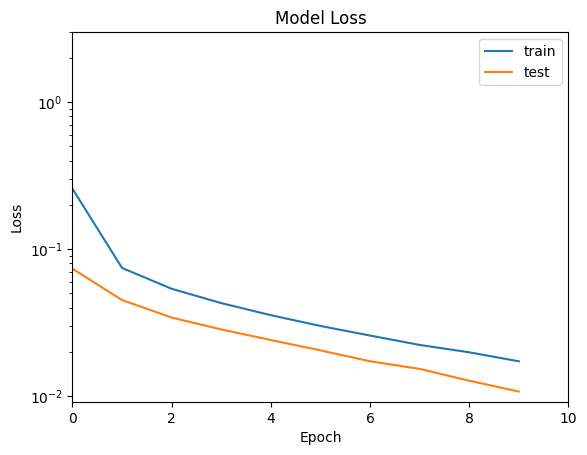

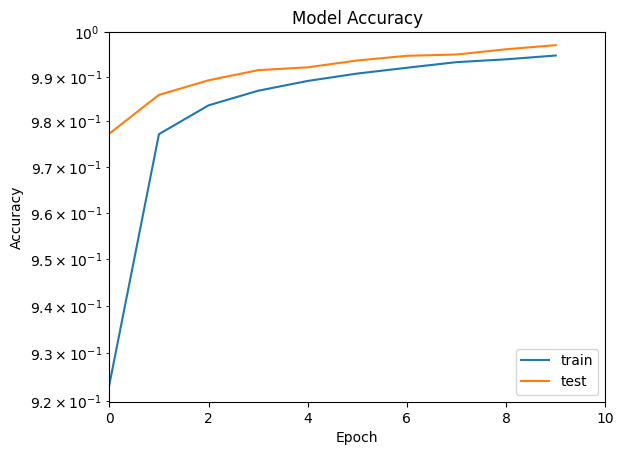

In [38]:
# We now want to plot the train and validation loss functions and accuracy curves
from matplotlib import pyplot as plt
# summarize history for loss
# START CODE HERE
plt.semilogy(history['loss'])
plt.semilogy(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylim(top=3)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.semilogy(history['acc'])
plt.semilogy(history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(top=1)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='lower right')
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

*   **Hidden layers activations**: experiment replacing sigmoids with ReLUs.
*   **Filter size**: experiment with (stacks of) square filters of size 3x3 so to obtain equivalent filters 5x5.
*   **Number of filters**: experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* **Pooling-less architectures**: Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from ResNet).
* **Confusion analysis**: Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ? 2 and 7, 4 and 9 are the most confused digits, maybe cause of the similar shape they have



In [39]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)
# START CODE HERE
# Mind that confusion_matrix requires
matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print (matrix)
# END CODE HERE

313/313 [==============================] - 1s 2ms/step
[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1031    0    0    0    0    1    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  891    1    0    0    0]
 [   1    1    0    0    0    0  956    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  973    1]
 [   0    0    0    0    1    0    0    2    0 1006]]


#Saving the training results

Save the best trained model (topology, parameters), and all the related side information required to deploy the trained model later on.

In [30]:
# Create a directory for saving both the trained model and side information
import os
import csv

save_dir = os.path.join(os.getcwd(), 'trained_lenet5_mnist')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

# Save model and weights
# START CODE HERE
model_name = 'trained_model.h5'
model.save(save_dir)
# END CODE HERE
print('Saved trained model at %s ' % save_dir)

# Saving mean and standard deviation information as a CSV file
model_param_file = 'mean_std.csv'
# START CODE HERE
with open(save_dir + "/" + model_param_file, 'w', newline = '') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(["Set Mean", "Set Standard Deviation"])
    # Write the row
    csv_writer.writerow([train_images.mean(), train_images.std()])
# END CODE HERE
print('Saved side information at %s ' % save_dir)

Saved trained model at /content/trained_lenet5_mnist 
Saved side information at /content/trained_lenet5_mnist 
